![](../images/bunker_neve.jpeg)
<br>
Photo: [*The Bunker*](https://www.thebunkerstudio.com/)

# Who Do You Sound Like?
### Notebook 2: Feature Engineering & Metric Comparisons
#### Adam Zucker
---

## Contents
- **Section 1:** Package and data imports
- **Section 2:** Comparing Spotify metrics with Librosa metrics
- **Section 3:** Engineering conversions between Librosa and Spotify
- **Section 4:** Data exports

---
### Section 1
#### Imports

In [23]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy as sp
import seaborn as sns

import os
import IPython.display as ipd

import spotipy
import librosa as lib
import librosa.display as libd

---

**BELOW:** Importing cleaned Spotify song dataset, sourced from [Kaggle](https://www.kaggle.com/yamaerenay/spotify-dataset-19212020-160k-tracks?select=data.csv). Some brief descriptions of less tangible features, as defined by [Spotify](https://developer.spotify.com/documentation/web-api/reference/):
- **Acousticness:** A confidence measure from 0.0 to 1.0 of whether the track is acoustic.
- **Danceability:** How suitable a track is for dancing based on a combination of musical elements including tempo, rhythm stability, beat strength, and overall regularity. A value of 0.0 is least danceable and 1.0 is most danceable. 
- **Energy:** A measure from 0.0 to 1.0 and represents a perceptual measure of intensity and activity. Typically, energetic tracks feel fast, loud, and noisy. For example, death metal has high energy, while a Bach prelude scores low on the scale. Perceptual features contributing to this attribute include dynamic range, perceived loudness, timbre, onset rate, and general entropy.
- **Instrumentalness:** Predicts whether a track contains vocals. “Ooh” and “aah” sounds are treated as instrumental in this context. Rap or spoken word tracks are clearly “vocal”. The closer the instrumentalness value is to 1.0, the greater likelihood the track contains no vocal content. Values above 0.5 are intended to represent instrumental tracks, but confidence is higher as the value approaches 1.0.
- **Liveness:** Detects the presence of an audience in the recording. Higher liveness values represent an increased probability that the track was performed live. A value above 0.8 provides strong likelihood that the track is live.
- **Loudness:** The overall loudness of a track in decibels (dB). Loudness values are averaged across the entire track and are useful for comparing relative loudness of tracks. Loudness is the quality of a sound that is the primary psychological correlate of physical strength (amplitude). Values typically range between -60 and 0 dB.
- **Popularity:** The popularity of a track is a value between 0 and 100, with 100 being the most popular. The popularity is calculated by algorithm and is based, in the most part, on the total number of plays the track has had and how recent those plays are. Generally speaking, songs that are being played a lot now will have a higher popularity than songs that were played a lot in the past. Duplicate tracks (e.g., the same track from a single and an album) are rated independently. Artist and album popularity is derived mathematically from track popularity.
- **Speechiness:** Detects the presence of spoken words in a track. The more exclusively speech-like the recording (e.g., talk show, audio book, poetry), the closer to 1.0 the attribute value. Values above 0.66 describe tracks that are probably made entirely of spoken words. Values between 0.33 and 0.66 describe tracks that may contain both music and speech, either in sections or layered, including such cases as rap music. Values below 0.33 most likely represent music and other non-speech-like tracks.
- **Valence:** A measure from 0.0 to 1.0 describing the musical positiveness conveyed by a track. Tracks with high valence sound more positive (e.g., happy, cheerful, euphoric), while tracks with low valence sound more negative (e.g., sad, depressed, angry).

---

In [2]:
df = pd.read_csv('../data_clean/spotify_kg_master.csv')
df.head()

,name,artists,tempo,key,mode,full_key,A minor,A# major,A# minor,B major,...,energy,instrumentalness,speechiness,acousticness,danceability,valence,popularity,liveness,year,id
0,Thunderstruck,['AC/DC'],133.5,4,1,E major,0,0,0,0,...,0.890,0.01170,0.0364,0.000147,0.502,0.259,83,0.217,1990,57bgtoPSgt236HzfBOd8kj
1,The Gift of Love,['Bette Midler'],157.5,8,1,G# major,0,0,0,0,...,0.467,0.00000,0.0287,0.359000,0.486,0.286,38,0.110,1990,7FUc1xVSKvABmVwI6kS5Y4
2,Thelma - Bonus Track,['Paul Simon'],94.0,5,1,F major,0,0,0,0,...,0.529,0.08450,0.0770,0.872000,0.710,0.882,29,0.093,1990,7pcEC5r1jVqWGRypo9D7f7
3,How I Need You,['Bad Boys Blue'],123.1,9,0,A minor,1,0,0,0,...,0.670,0.00347,0.0398,0.072400,0.652,0.963,44,0.119,1990,1yq8h4zD0IDT5X1YTaEwZh
4,Nunca Dudes De Mi,['El Golpe'],143.1,4,1,E major,0,0,0,0,...,0.490,0.00000,0.0295,0.151000,0.476,0.514,31,0.305,1990,5kNYkLFs3WFFgE6qhfWDEm


In [3]:
df.shape

(56798, 42)

In [4]:
df.isnull().sum()

name                0
artists             0
tempo               0
key                 0
mode                0
full_key            0
A minor             0
A# major            0
A# minor            0
B major             0
B minor             0
C major             0
C minor             0
C# major            0
C# minor            0
D major             0
D minor             0
D# major            0
D# minor            0
E major             0
E minor             0
F major             0
F minor             0
F# major            0
F# minor            0
G major             0
G minor             0
G# major            0
G# minor            0
loudness            0
duration_s          0
duration_ms         0
energy              0
instrumentalness    0
speechiness         0
acousticness        0
danceability        0
valence             0
popularity          0
liveness            0
year                0
id                  0
dtype: int64

In [5]:
# Data by year is quite evenly distributed.
df['year'].value_counts(normalize=True)

2018    0.034526
2002    0.033558
2001    0.033293
1998    0.033205
1996    0.033100
2006    0.032994
2010    0.032977
1990    0.032906
2017    0.032888
2014    0.032888
2011    0.032871
1995    0.032677
1997    0.032642
1994    0.032572
2007    0.032396
2004    0.032360
2000    0.032237
1992    0.032219
2005    0.032202
1993    0.032184
2009    0.032167
2019    0.032043
2008    0.031709
2003    0.031691
2013    0.031550
1999    0.031515
2020    0.031462
1991    0.031339
2015    0.030582
2016    0.029649
2012    0.029596
Name: year, dtype: float64

---
---
### Section 2
#### Metric Comparison

In [6]:
# Creating a small dataframe of songs I know well to test Spotify metrics against those generated by Librosa.
spotify_metrics_test_df = pd.concat((df[51917:51918], df[51440:51441], df[55871:55872], df[36982:36983],
                                     df[43245:43246], df[48257:48258], df[40585:40586], df[46528:46529],
                                     df[40245:40246], df[12541:12542]))

In [7]:
spotify_metrics_test_df

,name,artists,tempo,key,mode,full_key,A minor,A# major,A# minor,B major,...,energy,instrumentalness,speechiness,acousticness,danceability,valence,popularity,liveness,year,id
51917,ATTENTION,['Joji'],119.9,7,1,G major,0,0,0,0,...,0.312,0.022400,0.0383,0.89500,0.787,0.425,70,0.1150,2018,5aqu5xhPqoOWqF71PkfgM8
51440,SLOW DANCING IN THE DARK,['Joji'],89.0,3,1,D# major,0,0,0,0,...,0.479,0.005980,0.0261,0.54400,0.515,0.284,85,0.1910,2018,0rKtyWc8bvkriBthvHKY8d
55871,Levitating,['Dua Lipa'],103.0,6,0,F# minor,0,0,0,0,...,0.884,0.000000,0.0753,0.05610,0.695,0.914,78,0.2130,2020,39LLxExYz6ewLAcYrzQQyP
36982,Tighten Up,['The Black Keys'],109.0,6,0,F# minor,0,0,0,0,...,0.705,0.000004,0.0665,0.00121,0.504,0.567,62,0.4530,2010,2MVwrvjmcdt4MsYYLCYMt8
43245,Retrograde,['James Blake'],77.5,7,0,G minor,0,0,0,0,...,0.251,0.104000,0.0372,0.87300,0.533,0.186,66,0.1340,2013,2IqjKEBiz0CdLKdkXhxw84
48257,Way down We Go,['KALEO'],163.3,10,0,A# minor,0,0,1,0,...,0.505,0.000333,0.1170,0.57900,0.489,0.337,78,0.1040,2016,0y1QJc3SJVPKJ1OvFmFqe6
40585,Lotus Flower,['Radiohead'],128.0,2,0,D minor,0,0,0,0,...,0.676,0.336000,0.0321,0.08950,0.721,0.621,58,0.0826,2011,1amSa5xo79zINsgrpNlNge
46528,Paper Trail$,['Joey Bada$$'],93.6,1,0,C# minor,0,0,0,0,...,0.829,0.000000,0.2850,0.33900,0.548,0.452,63,0.5370,2015,23bOfmnZiN42pB1frXNyak
40245,Levels - Radio Edit,['Avicii'],126.0,1,0,C# minor,0,0,0,0,...,0.889,0.828000,0.0343,0.04620,0.584,0.464,76,0.3090,2011,5UqCQaDshqbIk3pkhy4Pjg
12541,Woo Hah!! Got You All in Check,['Busta Rhymes'],92.0,1,1,C# major,0,0,0,0,...,0.924,0.000000,0.3240,0.09850,0.716,0.786,56,0.3060,1996,09WxJCWFMWAxTHBLLelpDS


---

#### Librosa

In [8]:
# Defining global sample rate, frame size, and hop length for incoming audio
sr = 44100
frame = 2048
hop = 512

In [9]:
# Defining song filepaths for testing.
black_keys_wav = '../songs_test/blackkeys_tightenup.wav'
dua_lipa_wav = '../songs_test/dualipa_levitating.wav'
james_blake_wav = '../songs_test/jamesblake_retrograde.wav'
joey_wav = '../songs_test/joeybad_papertrails.wav'
joji_attn_wav = '../songs_test/joji_attention.wav'
# joji_slowdancing_wav = '../songs_test/joji_slowdancing.wav'
# kaleo_wav = '../songs_test/kaleo_waydownwego.wav'
# radiohead_wav = '../songs_test/radiohead_lotusflower.wav'

In [10]:
# ipd.Audio(dua_lipa_wav)

In [11]:
# ipd.Audio(joji_attn_wav)

In [12]:
# ipd.Audio(james_blake_wav)

**BELOW:** Loading songs into Librosa for feature extraction.

In [13]:
# avicii, sr = lib.load(avicii_wav, sr=sr)
black_keys, _ = lib.load(black_keys_wav, sr=sr)
# busta_rhymes, _ = lib.load(busta_rhymes_wav, sr=sr)
dua_lipa, _ = lib.load(dua_lipa_wav, sr=sr)
james_blake, _ = lib.load(james_blake_wav, sr=sr)
joey, _ = lib.load(joey_wav, sr=sr)
joji_attn, _ = lib.load(joji_attn_wav, sr=sr)
# joji_slowdancing, _ = lib.load(joji_slowdancing_wav, sr=sr)
# kaleo, _ = lib.load(kaleo_wav, sr=sr)
# radiohead, _ = lib.load(radiohead_wav, sr=sr)

In [14]:
joey.shape

(8587968,)

**BELOW:** Based on a comparison of four songs, the duration metric matches up for Spotify and Librosa. This makes sense, as they're just measuring duration of the audio file in seconds.

In [15]:
# Measuring duration in seconds for Dua Lipa - Levitating using Librosa
print(f'Librosa measured duration in seconds (Dua Lipa - Levitating): {lib.get_duration(dua_lipa, sr=sr, n_fft=frame, hop_length=hop)}')

# Comparing to Spotify measured duration
print(f"Spotify measured duration in seconds (Dua Lipa - Levitating): {df['duration_s'][55871]}")
print('-------------------------------------------------------------')
print('')

# Measuring duration in seconds for Joji - Attention using Librosa
print(f'Librosa measured duration in seconds (Joji - Attention): {lib.get_duration(joji_attn, sr=sr, n_fft=frame, hop_length=hop)}')

# Comparing to Spotify measured duration
print(f"Spotify measured duration in seconds (Joji - Attention): {df['duration_s'][51917]}")
print('-------------------------------------------------------------')
print('')

# Measuring duration in seconds for James Blake - Retrograde using Librosa
print(f'Librosa measured duration in seconds (James Blake - Retrograde): {lib.get_duration(james_blake, sr=sr, n_fft=frame, hop_length=hop)}')

# Comparing to Spotify measured duration
print(f"Spotify measured duration in seconds (James Blake - Retrograde): {df['duration_s'][43245]}")
print('-------------------------------------------------------------')
print('')

# Measuring duration in seconds for Joey Bada$$ - Paper Trails using Librosa
print(f'Librosa measured duration in seconds (Joey Bada$$ - Paper Trails): {lib.get_duration(joey, sr=sr, n_fft=frame, hop_length=hop)}')

# Comparing to Spotify measured duration
print(f"Spotify measured duration in seconds (Joey Bada$$ - Paper Trails): {df['duration_s'][46528]}")
print('-------------------------------------------------------------')
print('')

Librosa measured duration in seconds (Dua Lipa - Levitating): 203.80798185941043
Spotify measured duration in seconds (Dua Lipa - Levitating): 203.8
-------------------------------------------------------------

Librosa measured duration in seconds (Joji - Attention): 128.88820861678005
Spotify measured duration in seconds (Joji - Attention): 128.9
-------------------------------------------------------------

Librosa measured duration in seconds (James Blake - Retrograde): 223.6
Spotify measured duration in seconds (James Blake - Retrograde): 223.6
-------------------------------------------------------------

Librosa measured duration in seconds (Joey Bada$$ - Paper Trails): 194.73850340136053
Spotify measured duration in seconds (Joey Bada$$ - Paper Trails): 194.7
-------------------------------------------------------------



---
**BELOW:** Using Librosa's `.beat_track()` method to estimate the tempo of my four test tracks and compare against Spotify's metrics.

In [16]:
# Measuring tempo in BPM for Dua Lipa - Levitating using Librosa
tempo_dua, beats1 = lib.beat.beat_track(dua_lipa, sr=sr, hop_length=hop, units='time')
print(f'Librosa measured tempo in BPM (Dua Lipa - Levitating): {round(tempo_dua, 1)}')

# Comparing to Spotify measured tempo
print(f"Spotify measured tempo in BPM (Dua Lipa - Levitating): {df['tempo'][55871]}")
print('-------------------------------------------------------------')
print('')

# Measuring tempo in BPM for Joji - Attention using Librosa
tempo_joji, _ = lib.beat.beat_track(joji_attn, sr=sr, hop_length=hop, units='time')
print(f'Librosa measured tempo in BPM (Joji - Attention): {round(tempo_joji, 1)}')

# Comparing to Spotify measured tempo
print(f"Spotify measured tempo in BPM (Joji - Attention): {df['tempo'][51917]}")
print('-------------------------------------------------------------')
print('')

# Measuring tempo in BPM for James Blake - Retrograde using Librosa
tempo_james, _ = lib.beat.beat_track(james_blake, sr=sr, hop_length=hop, units='time')
print(f'Librosa measured tempo in BPM (James Blake - Retrograde): {round(tempo_james, 1)}')

# Comparing to Spotify measured tempo
print(f"Spotify measured tempo in BPM (James Blake - Retrograde): {df['tempo'][43245]}")
print('-------------------------------------------------------------')
print('')

# Measuring tempo in BPM for Joey Bada$$ - Paper Trails using Librosa
tempo_joey, _ = lib.beat.beat_track(joey, sr=sr, hop_length=hop, units='time')
print(f'Librosa measured tempo in BPM (Joey Bada$$ - Paper Trails): {round(tempo_joey, 1)}')

# Comparing to Spotify measured tempo
print(f"Spotify measured tempo in BPM (Joey Bada$$ - Paper Trails): {df['tempo'][46528]}")
print('-------------------------------------------------------------')
print('')

Librosa measured tempo in BPM (Dua Lipa - Levitating): 103.4
Spotify measured tempo in BPM (Dua Lipa - Levitating): 103.0
-------------------------------------------------------------

Librosa measured tempo in BPM (Joji - Attention): 120.2
Spotify measured tempo in BPM (Joji - Attention): 119.9
-------------------------------------------------------------

Librosa measured tempo in BPM (James Blake - Retrograde): 38.9
Spotify measured tempo in BPM (James Blake - Retrograde): 77.5
-------------------------------------------------------------

Librosa measured tempo in BPM (Joey Bada$$ - Paper Trails): 94.0
Spotify measured tempo in BPM (Joey Bada$$ - Paper Trails): 93.6
-------------------------------------------------------------



In [17]:
round((tempo_james * 2), 1)

77.7

**ABOVE:** Spotify's tempo metric for *Retrograde*, by James Blake, is the preferred representation of the tempo of this song, at 77.5 bpm. Librosa technically generated a correct tempo, in that it's the actual tempo of the song divided by two (or represented in half time), but based on the feel of the track, and where the percussion *transients* fall, the tempo for this song would ideally be represented as 77.5 bpm.

---

**BELOW:** Estimating song key based on the [Krumhansl-Schmuckler](http://davidtemperley.com/wp-content/uploads/2015/11/temperley-mp99.pdf) key-finding algorithm, and comparing to Spotify keys.

In [20]:
# Defining a function to estimate key based on the Krumhansl-Schmuckler algorithm
# Referencing https://gist.github.com/bmcfee/1f66825cef2eb34c839b42dddbad49fd

def key_estimator(chroma_vector):
    chroma_vector = sp.stats.zscore(chroma_vector)
    
    # Coefficients are defined by Krumhansl and Schmuckler, and sourced from http://davidtemperley.com/wp-content/uploads/2015/11/temperley-mp99.pdf
    major = np.asarray([6.35, 2.23, 3.48, 2.33, 4.38, 4.09, 2.52, 5.19, 2.39, 3.66, 2.29, 2.88])
    major = sp.stats.zscore(major)
    # Again here, coefficients are defined by Krumhansl and Schmuckler
    minor = np.asarray([6.33, 2.68, 3.52, 5.38, 2.60, 3.53, 2.54, 4.75, 3.98, 2.69, 3.34, 3.17])
    minor = sp.stats.zscore(minor)
    
    # Using Scipy's .circulant() method to determine all major and minor key rotations
    # Referencing https://docs.scipy.org/doc/scipy/reference/generated/scipy.linalg.circulant.html
    major = sp.linalg.circulant(major)
    minor = sp.linalg.circulant(minor)
    
    return major.T.dot(chroma_vector), minor.T.dot(chroma_vector)

In [68]:
# Using Librosa's .chroma_stft() method to compute a chromagram vector for a few test tracks
dua_chroma = lib.feature.chroma_stft(dua_lipa, sr=sr, n_fft=frame, hop_length=hop, window=sp.signal.windows.hann)

In [69]:
dua_chroma.shape

(12, 17555)

In [70]:
dua_chroma

array([[0.        , 0.        , 0.        , ..., 0.89867866, 0.86551255,
        0.719558  ],
       [0.        , 0.        , 0.        , ..., 0.8003816 , 0.913107  ,
        0.93246454],
       [0.        , 0.        , 0.        , ..., 0.68931043, 0.7823929 ,
        1.        ],
       ...,
       [0.        , 0.        , 0.        , ..., 0.66141593, 0.74059874,
        0.49795252],
       [0.        , 0.        , 0.        , ..., 0.8405975 , 0.8477092 ,
        0.69717693],
       [0.        , 0.        , 0.        , ..., 1.        , 1.        ,
        0.73045176]], dtype=float32)

In [64]:
key_estimator(dua_chroma)

/Users/adam/opt/anaconda3/envs/dsi/lib/python3.8/site-packages/scipy/stats/stats.py:2500: RuntimeWarning: invalid value encountered in true_divide
  return (a - mns) / sstd


(array([[        nan,         nan,         nan, ...,  0.15170024,
         -1.83805935, -1.68751316],
        [        nan,         nan,         nan, ...,  0.77885004,
          1.25780626,  2.62431572],
        [        nan,         nan,         nan, ..., -1.53415051,
         -0.23886394,  1.73656113],
        ...,
        [        nan,         nan,         nan, ..., -2.23728098,
          0.71295623, -1.71808591],
        [        nan,         nan,         nan, ..., -1.85470924,
         -1.17114508,  3.14073939],
        [        nan,         nan,         nan, ...,  1.38161558,
          1.58787897, -1.32358805]]),
 array([[        nan,         nan,         nan, ...,  1.37630339,
         -0.95368582,  0.10733266],
        [        nan,         nan,         nan, ...,  0.14231125,
          1.51975379, -0.73412177],
        [        nan,         nan,         nan, ..., -2.79653705,
         -0.37541976,  5.02423175],
        ...,
        [        nan,         nan,         nan, ...,  

In [59]:
dua_chroma2 = lib.feature.chroma_cqt(dua_lipa, sr=sr, hop_length=hop)

In [36]:
dua_chroma2

array([[0.03085967, 0.0306543 , 0.03090523, ..., 0.00028198, 0.00023008,
        0.00021703],
       [0.04343623, 0.04373186, 0.0444862 , ..., 0.00021327, 0.00023492,
        0.00021668],
       [0.02133732, 0.02179134, 0.02328406, ..., 0.00022453, 0.00023958,
        0.0002483 ],
       ...,
       [0.02588383, 0.02837694, 0.02884419, ..., 0.00033382, 0.0003056 ,
        0.00027159],
       [0.01365558, 0.01645151, 0.01699676, ..., 0.00074726, 0.00075509,
        0.00070682],
       [0.00710195, 0.00847484, 0.00954213, ..., 0.00059421, 0.00059752,
        0.00055365]], dtype=float32)

In [38]:
key_dua_2 = key_estimator(dua_chroma2)

In [41]:
key_dua_2

(array([[ 1.66946272,  1.34161175,  1.13154564, ..., -3.93786525,
         -4.76322464, -4.60871966],
        [ 7.28193145,  7.40455564,  7.45636146, ..., -1.33595681,
         -0.97803388, -0.76180865],
        [-1.62545646, -1.56724107, -1.50740094, ..., -2.39513436,
         -2.39848619, -2.59703894],
        ...,
        [ 2.58734985,  2.93874449,  2.97643349, ..., -2.76449365,
         -2.30551165, -3.52749695],
        [-2.76848482, -2.44028128, -2.33069528, ...,  4.69920383,
          4.97381166,  6.02872944],
        [-3.78407494, -4.0623196 , -3.97523852, ...,  3.00770277,
          3.36086192,  2.93110632]]),
 array([[-1.64957614, -2.16570768, -2.29124081, ..., -2.00365406,
         -2.82949559, -2.34082733],
        [ 6.14425773,  6.15175603,  6.13781432, ..., -3.94591999,
         -3.29771167, -4.56719493],
        [ 0.89819342,  1.19954781,  1.45785746, ..., -1.05652519,
         -0.52751552,  0.10184971],
        ...,
        [ 1.36146247,  1.59943444,  1.48849863, ..., -

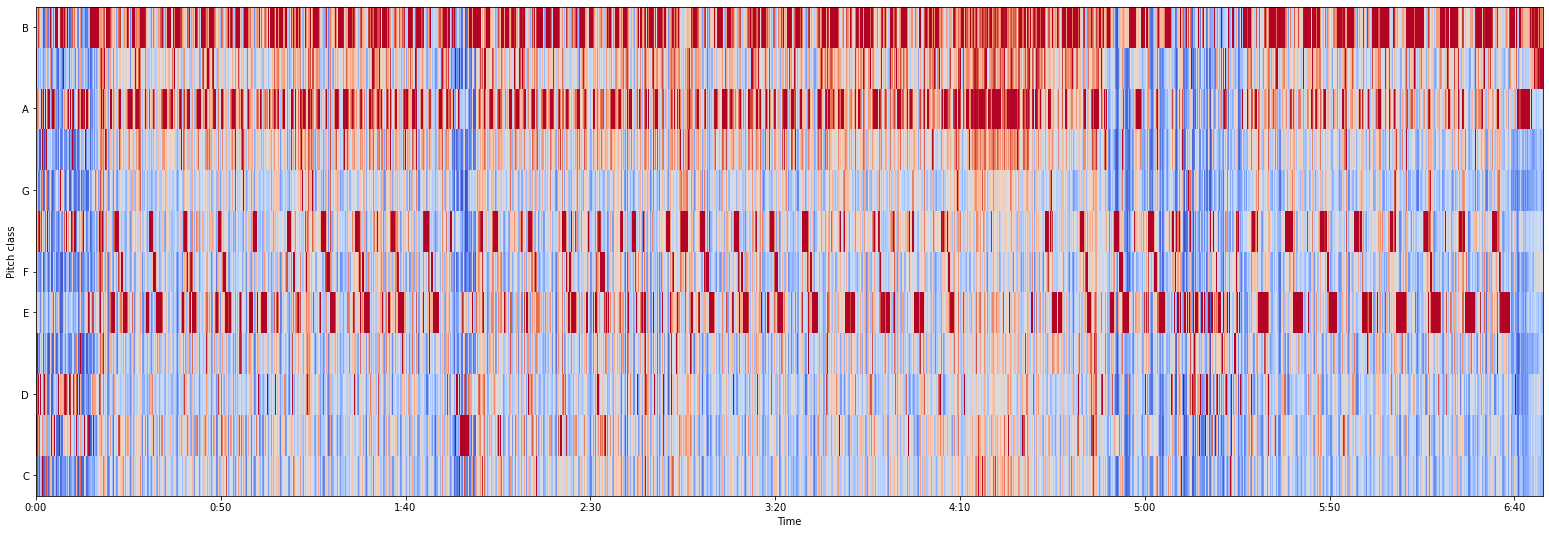

In [60]:
plt.figure(figsize=(27, 9))
lib.display.specshow(dua_chroma2, x_axis='time', y_axis='chroma', hop_length=hop, cmap='coolwarm');

In [73]:
# pitches, magnitudes = lib.piptrack(joey, sr=sr, n_fft=frame, hop_length=hop)

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

---

In [80]:
james_perc = lib.effects.percussive(james_blake, margin=2)

In [81]:
james_perc

array([-6.1855317e-06,  4.7398416e-06, -2.1393319e-07, ...,
        0.0000000e+00,  0.0000000e+00,  0.0000000e+00], dtype=float32)

In [82]:
tempo_james, _ = lib.beat.beat_track(james_perc, sr=sr, hop_length=hop, units='time')
print(f'Librosa measured tempo in BPM (James Blake - Retrograde): {round(tempo_james, 1)}')

Librosa measured tempo in BPM (James Blake - Retrograde): 38.9


---

**BELOW:** Using Librosa's `.hpss()` method to separate harmonic and percussive elements from tracks.

In [83]:
dua_harmonic, dua_percussive = lib.effects.hpss(dua_lipa, margin=2)

In [84]:
# Using Librosa's .chroma_stft() method to compute a chromagram vector for a few test tracks
dua_chroma3 = lib.feature.chroma_stft(dua_harmonic, sr=sr, n_fft=frame, hop_length=hop, window=sp.signal.windows.hann)

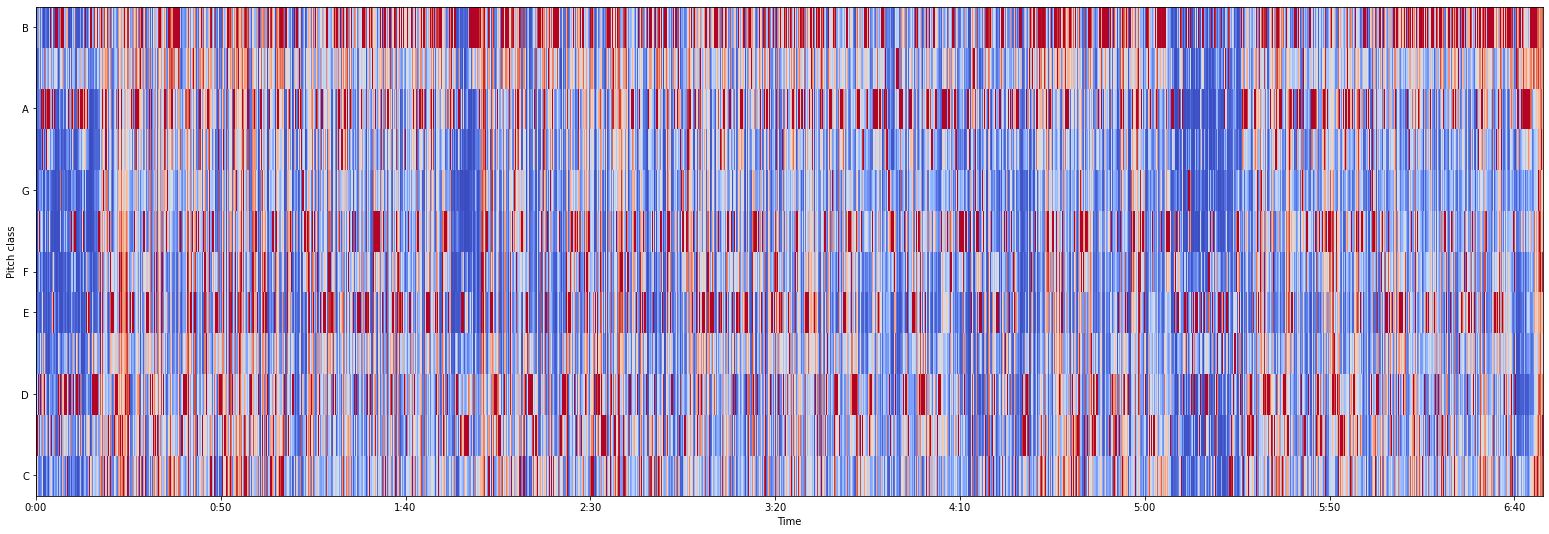

In [85]:
plt.figure(figsize=(27, 9))
lib.display.specshow(dua_chroma3, x_axis='time', y_axis='chroma', hop_length=hop, cmap='coolwarm');

In [86]:
dua_chroma4 = lib.feature.chroma_cqt(dua_harmonic, sr=sr, hop_length=hop)

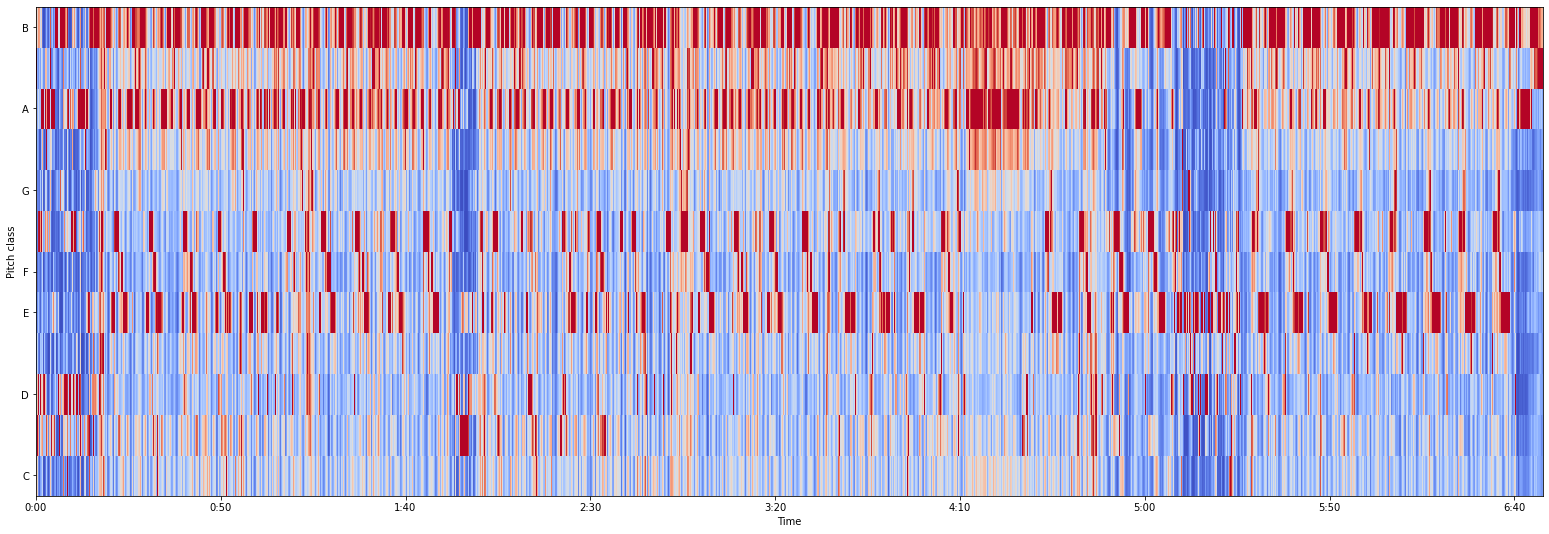

In [87]:
plt.figure(figsize=(27, 9))
lib.display.specshow(dua_chroma4, x_axis='time', y_axis='chroma', hop_length=hop, cmap='coolwarm');

---

**BLEOW:** Looking at RMS loudness.

In [89]:
james_rms = lib.feature.rms(james_blake, frame_length=frame, hop_length=hop)

In [91]:
james_rms.mean()

0.18225987

In [92]:
df['loudness'][43245]

-11.283